In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob

np.random.seed(1234)

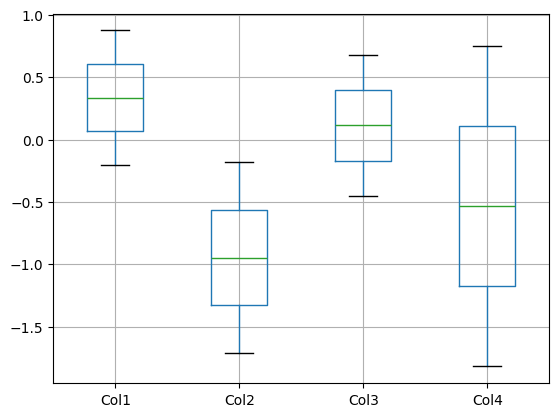

In [39]:
df = pd.DataFrame(np.random.randn(2, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3', 'Col4'])  

In [40]:
df = pd.DataFrame(np.random.randn(2, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
df.head()

,Col1,Col2,Col3,Col4
0,0.047072,0.394844,-0.248432,-0.617707
1,-0.682884,0.436258,-1.703013,0.393711


In [44]:
results = np.array(
    [[10.62, 26.25, 1.34],
     [10.07, 21.45, 2.68],
     [3.57, 12.04, 1.27],
     [7.48, 29.45, 1.53]]
)

cols = ['Par0003.affine', 'Par0003.bs-R1-fg', 'Par0003.bs-R6-ug']

df = pd.DataFrame(results, columns=cols, index=['copd1', 'copd2', 'copd3', 'copd4'])
df.head()

,Par0003.affine,Par0003.bs-R1-fg,Par0003.bs-R6-ug
copd1,10.62,26.25,1.34
copd2,10.07,21.45,2.68
copd3,3.57,12.04,1.27
copd4,7.48,29.45,1.53


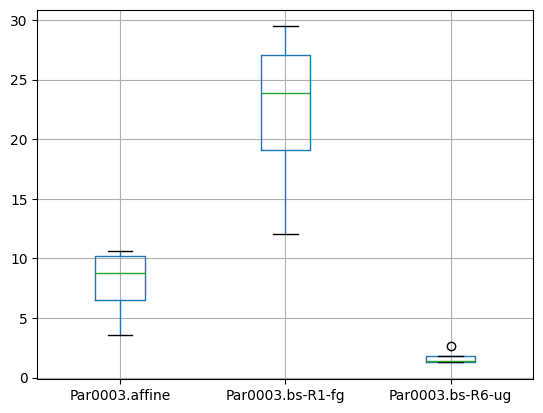

In [51]:
boxplot = df.boxplot(column=cols)  

In [49]:
stats = df.describe()
stats

,Par0003.affine,Par0003.bs-R1-fg,Par0003.bs-R6-ug
count,4.000000,4.000000,4.000000
mean,7.935000,22.297500,1.705000
std,3.215986,7.587601,0.659217
min,3.570000,12.040000,1.270000
25%,6.502500,19.097500,1.322500
50%,8.775000,23.850000,1.435000
75%,10.207500,27.050000,1.817500
max,10.620000,29.450000,2.680000


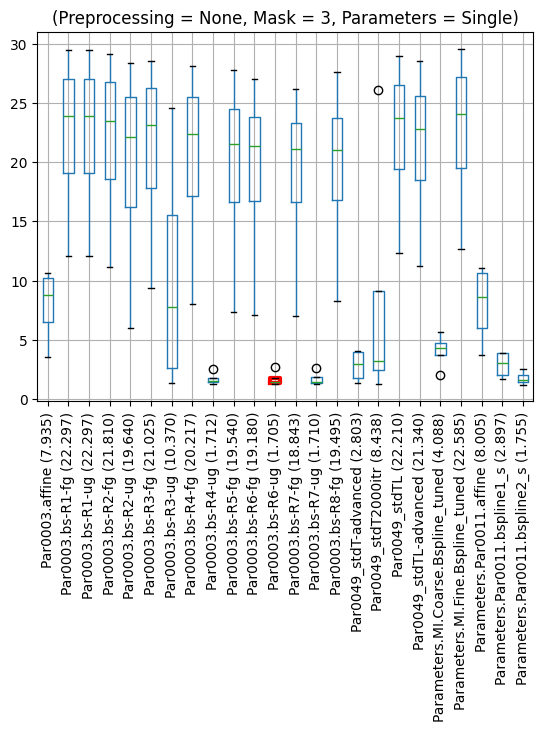

In [150]:
def plot_boxplot(experiment_name, output_dir, exclude=[], title="Boxplot"):
    '''
    Plot boxplot for the given data.

    Args:
        experiment_name (str): Name of the experiment.
        output_dir (str): Path to the output directory.
        exclude (list): List of columns to exclude from the boxplot.
        title (str): Title of the plot.

    Returns:
        None. The function generates and displays the box plot.
    '''

    # Get the data
    columns = os.listdir(f'../output/{experiment_name}/')
    TRE_sample_results = [path.replace('\\', '/') for path in sorted(glob(os.path.join(output_dir, experiment_name, "***", "points", "TRE_sample_results.csv"), recursive=True))]

    # Remove the excluded columns
    for column in exclude:
        columns.remove(column)

        TRE_sample_results = [item for item in TRE_sample_results if column not in item]

    # debugging
    # columns = columns[:2]
    # TRE_sample_results = TRE_sample_results[:2]

    # assert len(columns) == len(TRE_sample_results)
    assert  len(columns) == len(TRE_sample_results), f"Number of columns ({len(columns)}) does not match number of results ({len(TRE_sample_results)})"

    # Create a dataframe
    df = pd.DataFrame(columns=columns)

    for i, path in enumerate(TRE_sample_results):
        # Read the csv file
        data = pd.read_csv(path, index_col=0)

        # Add the data to the dataframe
        columns[i] = columns[i] + f" ({data['TRE_mean'].mean():.3f})"
        df[columns[i]] = data['TRE_mean']
        
    # Plot the boxplot
    boxplot = df.boxplot(column=columns, rot=90)

    # Get the lowest values for each column
    lowest_values = df.mean()

    # Get the column with the overall lowest minimum value
    lowest_column = lowest_values.idxmin()

    # Highlight the entire boxplot for the column with the lowest minimum value in red
    position = columns.index(lowest_column) + 1
    boxplot.get_lines()[position * 7 - 7].set(color='red', linewidth=3)  

    # Set plot title
    plt.title(title)

    # Show the plot
    plt.show()


experiment_name = 'NoPreprocessing+UseMasks3+SingleParamFile'
plot_boxplot(
    experiment_name, 
    '../output/', 
    exclude=['Parameters.MI.RP.Bspline_tuned', 'Par0003.bs-R8-ug'],
    title = "(Preprocessing = None, Mask = 3, Parameters = Single)")
